In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import time

In [68]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, 
                        cv=None,
                        n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring='accuracy',
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    '''# Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")'''

    return plt

# Heart Failure

In [81]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#
# Need to split data into train/test, and transform (normalize) values to be between [0, 1]
#
X = data.copy()
X.drop(columns='DEATH_EVENT', inplace=True)

y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

#min_max_scaler = preprocessing.MinMaxScaler()
#X_train_minmax = min_max_scaler.fit_transform(X_train)
#X_test_minmax = min_max_scaler.fit_transform(X_test)

Do not need to normalize data for boosting, since the ensemble method is similar to a decision tree type of learning. 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
https://stackoverflow.com/questions/49500313/tune-parameters-in-gradient-boosting-reggression-with-cross-validation-sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

In [82]:
def booster_tuning(X, y, X_test, y_test, classifier, param_grid, title):
    #create new a knn model
    clf = classifier
    clf_gscv = GridSearchCV(clf, param_grid, cv=5) #fit model to data
    clf_gscv.fit(X, y)

    #check top performing n_neighbors value
    print(clf_gscv.best_params_)

    
    
    try:
        #check mean score for the top performing value of n_neighbors
        pred = clf_gscv.predict(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
        print(metrics.auc(fpr, tpr))
        print(clf_gscv.best_score_)
        plot_roc_curve(clf_gscv, X_test, y_test)  # doctest: +SKIP
        plt.title(title)
        plt.show() 
    except:
        pass
    return clf_gscv

Determine best alpha

In [83]:
def best_alpha(X_train, y_train, X_test, y_test, data_name):
    clfs, scores = [], []
    alphas = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25])
    for ccp_alpha in alphas:
        clf = GradientBoostingClassifier(ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        clfs.append(clf.score(X_train, y_train))
        scores.append(clf.score(X_test, y_test))
        
    plt.plot(alphas, clfs, label='train')
    plt.plot(alphas, scores, label='test')
    plt.xlabel('alpha')
    plt.ylabel('accuracy')
    plt.legend()
    plt.title(f'Effect of tuning parameter alpha on {data_name} accuracy (train/test)')

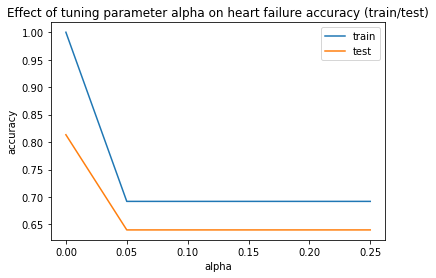

In [84]:
best_alpha(X_train, y_train, X_test, y_test, 'heart failure')

Get the optimal hyperparameters for the heart failure dataset using GradientBoosting

In [85]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
'max_features': [2, 3, 4, 5, 6, 7],
'min_samples_leaf': [5],
'min_samples_split': [12, 14, 16],
'n_estimators': [25],
'learning_rate': [0.1]
}
    
model = booster_tuning(X_train, y_train, X_test, y_test, GradientBoostingClassifier(),
               param_grid, 'GradientBoosting Accuracy on Heart Failure Data')

{'learning_rate': 0.1, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 14, 'n_estimators': 25}
0.7835648148148149
0.866060606060606


In [87]:
test = GradientBoostingClassifier(learning_rate=0.1, max_features=6, min_samples_leaf=5, 
                                 min_samples_split=14, n_estimators=25)
test.fit(X_train, y_train)
pred = test.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
print(metrics.auc(fpr, tpr))

0.8310185185185186


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

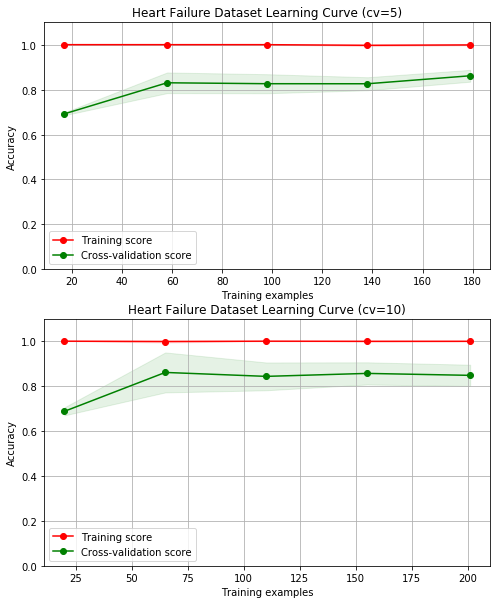

In [88]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=200, max_features=3, 
                                   min_samples_leaf=5, min_samples_split=12, n_estimators=25,
                                  ccp_alpha=0)
plot_learning_curve(model, 
                    'Heart Failure Dataset Learning Curve (cv=5)', 
                    X_train, y_train, axes=axes[0], ylim=(0.0, 1.1),
                    cv=5, n_jobs=4)

plot_learning_curve(model, 
                    'Heart Failure Dataset Learning Curve (cv=10)', 
                    X_train, y_train, axes=axes[1], ylim=(0.0, 1.1),
                    cv=10, n_jobs=4)

Boosting leads to great performance for both classification problems presented (multi-class and binary).  Main con is the training time required, but this is also because we did so much hyperparameter tuning.  There may be some bias though due to our datasets being classification problems in the same domain.  Might be worth noting how boosting performs with other types of data (image, waveform, etc.)

## Repeat for diabetes

In [92]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(data.columns)

# Handle Categorical features
clfs = {c:preprocessing.LabelEncoder() for c in ['Gender', 'family_history_with_overweight',
                                   'FAVC', 'CAEC', 'SMOKE', 
                                   'SCC','CALC', 'MTRANS', 'NObeyesdad']}

for col, clf in clfs.items():
    df[col] = clfs[col].fit_transform(df[col])
    
#
# Need to split data into train/test, and transform (normalize) values to be between [0, 1]
#

X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


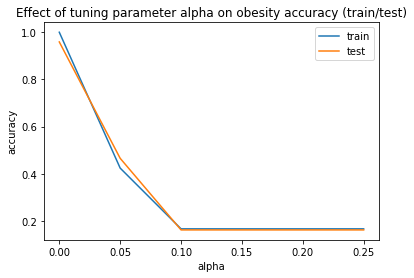

In [93]:
best_alpha(X_train, y_train, X_test, y_test, 'obesity')

In [94]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {
'max_depth': [10, 100, 200],
'max_features': [2, 3],
'min_samples_leaf': [3, 4, 5],
'min_samples_split': [8, 10, 12],
'n_estimators': [10, 25, 50, 100],
'learning_rate': [0.1, 0.5, 1]
}
    
start = time.time()    
model = booster_tuning(X_train, y_train, X_test, y_test, GradientBoostingClassifier(),
               param_grid, 'GradientBoosting Accuracy Normalized Data')
print(f'{time.time() - start} seconds to complete CV grid search')


{'learning_rate': 0.5, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
23.38586187362671 seconds to complete CV grid search


0.9791205526499646

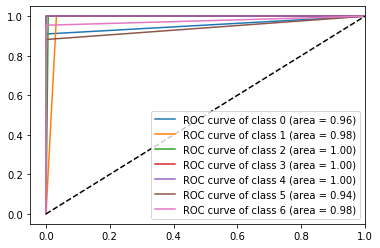

In [95]:
#model = GradientBoostingClassifier(n_neighbors=1)
#model.fit(X_train_minmax, y_train)

y_train_bin = preprocessing.label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_bin = preprocessing.label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_pred = model.predict(X_test)
y_pred = preprocessing.label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5, 6])

n_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])

np.mean(list(roc_auc.values()))

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

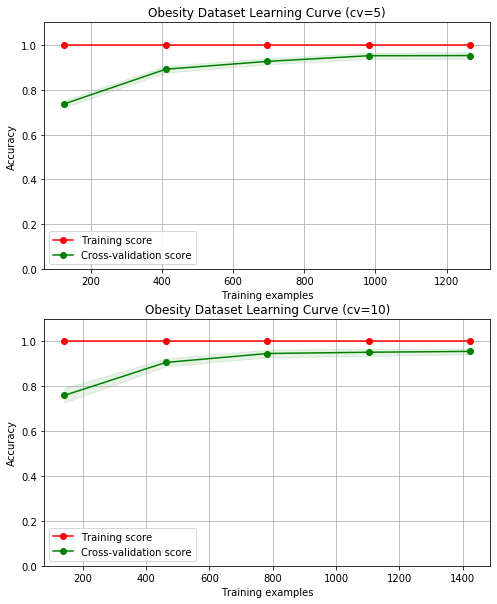

In [96]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
model = GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features=3, 
                                   min_samples_leaf=3, min_samples_split=10, n_estimators=100,
                                  ccp_alpha=0)
plot_learning_curve(model, 
                    'Obesity Dataset Learning Curve (cv=5)', 
                    X_train, y_train, axes=axes[0], ylim=(0.0, 1.1),
                    cv=5, n_jobs=4)

plot_learning_curve(model, 
                    'Obesity Dataset Learning Curve (cv=10)', 
                    X_train, y_train, axes=axes[1], ylim=(0.0, 1.1),
                    cv=10, n_jobs=4)

0.9791205526499646

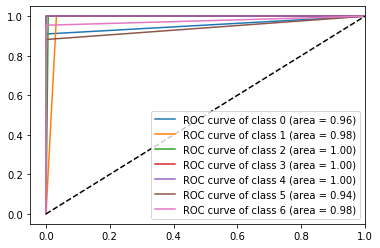

In [98]:
n_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])

np.mean(list(roc_auc.values()))